<a href="https://colab.research.google.com/github/AlanJack48/Reliance-Stock-Price-Forecasting/blob/main/Reliance_Stock_Price_Forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Packages**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Reading the Dataset**


In [2]:
df = pd.read_csv('Reliance.csv')

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-10-04,2553.000000,2574.850098,2537.050049,2556.149902,2548.477051,5038910
1,2021-10-05,2555.100098,2612.000000,2547.350098,2609.199951,2601.367920,6245770
2,2021-10-06,2619.949951,2619.949951,2551.100098,2559.850098,2552.166260,4734472
3,2021-10-07,2595.000000,2598.750000,2567.699951,2572.399902,2564.678467,2924370
4,2021-10-08,2585.250000,2684.399902,2581.500000,2671.250000,2663.231689,7279003


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       250 non-null    object 
 1   Open       250 non-null    float64
 2   High       250 non-null    float64
 3   Low        250 non-null    float64
 4   Close      250 non-null    float64
 5   Adj Close  250 non-null    float64
 6   Volume     250 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.8+ KB


**Sort dataset acc to Date in descending**

In [5]:
df.sort_values('Date', inplace= True)

In [6]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-10-04,2553.000000,2574.850098,2537.050049,2556.149902,2548.477051,5038910
1,2021-10-05,2555.100098,2612.000000,2547.350098,2609.199951,2601.367920,6245770
2,2021-10-06,2619.949951,2619.949951,2551.100098,2559.850098,2552.166260,4734472
3,2021-10-07,2595.000000,2598.750000,2567.699951,2572.399902,2564.678467,2924370
4,2021-10-08,2585.250000,2684.399902,2581.500000,2671.250000,2663.231689,7279003


**Visualize Price of stock over a year**

**Creating new Dataset of series type of price/close with Date as index**

In [7]:
df['Close'].dtype

dtype('float64')

In [8]:
reliance_price = df['Close']

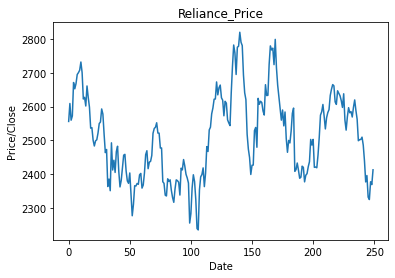

In [9]:
plt.plot(reliance_price)

plt.title("Reliance_Price")
plt.xlabel("Date")
plt.ylabel("Price/Close")

plt.show()


In [10]:
reliance_price

0      2556.149902
1      2609.199951
2      2559.850098
3      2572.399902
4      2671.250000
          ...     
245    2332.449951
246    2325.300049
247    2377.750000
248    2369.500000
249    2413.199951
Name: Close, Length: 250, dtype: float64

**Convert series into DataFrame**

In [11]:
reliance_price = pd.DataFrame(reliance_price)
reliance_price

,Close
0,2556.149902
1,2609.199951
2,2559.850098
3,2572.399902
4,2671.250000
...,...
245,2332.449951
246,2325.300049
247,2377.750000
248,2369.500000


In [12]:
train = reliance_price.iloc[:230]
test = reliance_price.iloc[230:]

In [13]:
train #80 percent of dataset

,Close
0,2556.149902
1,2609.199951
2,2559.850098
3,2572.399902
4,2671.250000
...,...
225,2637.949951
226,2560.399902
227,2530.500000
228,2569.800049


In [14]:
test.shape #20percent of dataset

(20, 1)

**Scaling of dataset for Neural Network**

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_train = scaler.fit_transform(train)
scaled_test = scaler.transform(test)

**Create TimeSeriesGenerator for time series problem**

In [16]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [17]:
length = 20
batch_size = 30

generator = TimeseriesGenerator(scaled_train, scaled_train, length= length, batch_size= batch_size)

**Model Creation**

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, Dropout

**SimpleRNN model Creation**

In [19]:
n_features = 1

In [20]:
model = Sequential()

model.add(SimpleRNN(30, input_shape= (length, n_features)))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer= 'adam', loss= 'mse')

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 30)                960       
                                                                 
 dropout (Dropout)           (None, 30)                0         
                                                                 
 dense (Dense)               (None, 1)                 31        
                                                                 
Total params: 991
Trainable params: 991
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.fit_generator(generator, epochs= 10, shuffle= False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/10
7/7 [==============================] - 2s 10ms/step - loss: 0.1703
Epoch 2/10
7/7 [==============================] - 0s 8ms/step - loss: 0.0670
Epoch 3/10
7/7 [==============================] - 0s 8ms/step - loss: 0.0635
Epoch 4/10
7/7 [==============================] - 0s 10ms/step - loss: 0.0546
Epoch 5/10
7/7 [==============================] - 0s 13ms/step - loss: 0.0387
Epoch 6/10
7/7 [==============================] - 0s 11ms/step - loss: 0.0409
Epoch 7/10
7/7 [==============================] - 0s 11ms/step - loss: 0.0376
Epoch 8/10
7/7 [==============================] - 0s 11ms/step - loss: 0.0351
Epoch 9/10
7/7 [==============================] - 0s 13ms/step - loss: 0.0320
Epoch 10/10
7/7 [==============================] - 0s 8ms/step - loss: 0.0281


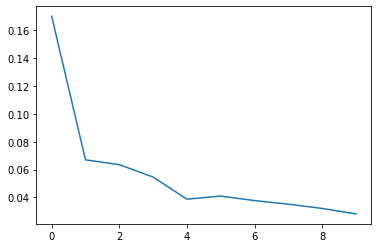

In [23]:
loss_df= pd.DataFrame(model.history.history)
plt.plot(loss_df)

In [24]:
first_batch_prediction = scaled_train[-length:]
first_batch_prediction = first_batch_prediction.reshape((1,length,1))
first_batch_prediction.shape

(1, 20, 1)

In [25]:
model.predict(first_batch_prediction)

1/1 [==============================] - 0s 384ms/step


array([[0.49014443]], dtype=float32)

In [26]:
scaled_test[0]

array([0.59253862])

In [27]:
test_predictions = []

first_batch = scaled_train[-length:]
curr_batch = first_batch.reshape((1,length,n_features))

for i in range(len(test)):
  curr_pred = model.predict(curr_batch)[0]

  test_predictions.append(curr_pred)
  
curr_batch = np.append(curr_batch[:,1:,:], [[curr_pred]], axis=1)

1/1 [==============================] - 0s 42ms/step


In [28]:
test_predictions

[array([0.49014443], dtype=float32),
 array([0.49014443], dtype=float32),
 array([0.49014443], dtype=float32),
 array([0.49014443], dtype=float32),
 array([0.49014443], dtype=float32),
 array([0.49014443], dtype=float32),
 array([0.49014443], dtype=float32),
 array([0.49014443], dtype=float32),
 array([0.49014443], dtype=float32),
 array([0.49014443], dtype=float32),
 array([0.49014443], dtype=float32),
 array([0.49014443], dtype=float32),
 array([0.49014443], dtype=float32),
 array([0.49014443], dtype=float32),
 array([0.49014443], dtype=float32),
 array([0.49014443], dtype=float32),
 array([0.49014443], dtype=float32),
 array([0.49014443], dtype=float32),
 array([0.49014443], dtype=float32),
 array([0.49014443], dtype=float32)]

In [29]:
import math
from sklearn.metrics import mean_squared_error, mean_absolute_error
print('MSE :', mean_squared_error(scaled_test, test_predictions))
print('RMES :', math.sqrt(mean_squared_error(scaled_test, test_predictions)))
print('MAS :', mean_absolute_error(scaled_test, test_predictions))

MSE : 0.03043678148968155
RMES : 0.17446140401155077
MAS : 0.1459010264259637


In [30]:
test_predictions = scaler.inverse_transform(test_predictions)

In [31]:
test['RNN_prediction'] = test_predictions

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [32]:
test

,Close,RNN_prediction
230,2581.750000,2521.915947
231,2585.399902,2521.915947
232,2569.300049,2521.915947
233,2598.050049,2521.915947
234,2619.750000,2521.915947
235,2588.350098,2521.915947
236,2562.699951,2521.915947
237,2499.199951,2521.915947
238,2502.449951,2521.915947
239,2502.850098,2521.915947


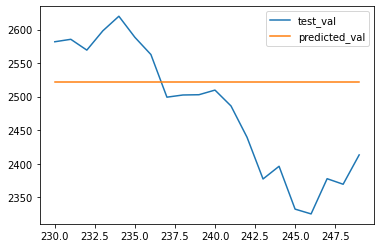

In [33]:
plt.plot(test['Close'], label ='test_val')
plt.plot(test['RNN_prediction'], label= 'predicted_val')
plt.legend()

In [34]:
scaled_full_data = scaler.fit_transform(reliance_price)

In [35]:
generator = TimeseriesGenerator(scaled_full_data, scaled_full_data,length= length, batch_size= batch_size)

In [36]:
model2 = Sequential()
model2.add(SimpleRNN(30,input_shape = (length, n_features)))
model2.add(Dropout(0.2))
model2.add(Dense(1))

model2.compile(optimizer='adam', loss='mse')


In [37]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 30)                960       
                                                                 
 dropout_1 (Dropout)         (None, 30)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 31        
                                                                 
Total params: 991
Trainable params: 991
Non-trainable params: 0
_________________________________________________________________


In [38]:
model2.fit_generator(generator, epochs= 10, shuffle= False)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


8/8 [==============================] - 1s 7ms/step - loss: 0.0611
Epoch 2/10
8/8 [==============================] - 0s 5ms/step - loss: 0.0489
Epoch 3/10
8/8 [==============================] - 0s 6ms/step - loss: 0.0398
Epoch 4/10
8/8 [==============================] - 0s 5ms/step - loss: 0.0342
Epoch 5/10
8/8 [==============================] - 0s 8ms/step - loss: 0.0278
Epoch 6/10
8/8 [==============================] - 0s 5ms/step - loss: 0.0267
Epoch 7/10
8/8 [==============================] - 0s 5ms/step - loss: 0.0234
Epoch 8/10
8/8 [==============================] - 0s 5ms/step - loss: 0.0212
Epoch 9/10
8/8 [==============================] - 0s 5ms/step - loss: 0.0242
Epoch 10/10
8/8 [==============================] - 0s 7ms/step - loss: 0.0279


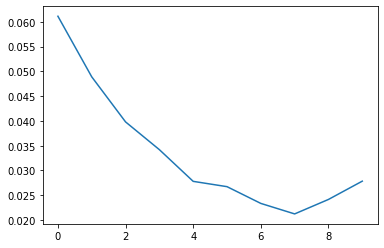

In [39]:
loss_df_2 = pd.DataFrame(model2.history.history)
plt.plot(loss_df_2)

# **Model Forecast for next 20 days**

In [64]:
forecast = []

first_batch = scaled_full_data[-length:]
curr_batch = first_batch.reshape((1,length,n_features))

for i in range(len(test)):

  curr_pred = model2.predict(curr_batch)[0]

  forecast.append(curr_pred)

  curr_batch = np.append(curr_batch[:,1:,:], [[curr_pred]], axis=1)

1/1 [==============================] - 0s 21ms/step


In [65]:
forecast

[array([0.22968817], dtype=float32),
 array([0.27373865], dtype=float32),
 array([0.3278298], dtype=float32),
 array([0.33930627], dtype=float32),
 array([0.33793885], dtype=float32),
 array([0.33754426], dtype=float32),
 array([0.39475197], dtype=float32),
 array([0.35981408], dtype=float32),
 array([0.3546062], dtype=float32),
 array([0.39028418], dtype=float32),
 array([0.4144777], dtype=float32),
 array([0.41828918], dtype=float32),
 array([0.38215336], dtype=float32),
 array([0.41428292], dtype=float32),
 array([0.44220963], dtype=float32),
 array([0.41520202], dtype=float32),
 array([0.3941898], dtype=float32),
 array([0.41057074], dtype=float32),
 array([0.43843055], dtype=float32),
 array([0.4121025], dtype=float32)]

In [66]:
forecast = scaler.inverse_transform(forecast)
forecast

array([[2369.71830323],
       [2395.4592084 ],
       [2427.06738043],
       [2433.77364927],
       [2432.97459729],
       [2432.74402282],
       [2466.17335002],
       [2445.75739152],
       [2442.71417426],
       [2463.56259921],
       [2477.70008809],
       [2479.927326  ],
       [2458.81135456],
       [2477.58626372],
       [2493.90524133],
       [2478.12334201],
       [2465.84485106],
       [2475.41705256],
       [2491.69693352],
       [2476.31213081]])

In [67]:
forecast.flatten()

array([2369.71830323, 2395.4592084 , 2427.06738043, 2433.77364927,
       2432.97459729, 2432.74402282, 2466.17335002, 2445.75739152,
       2442.71417426, 2463.56259921, 2477.70008809, 2479.927326  ,
       2458.81135456, 2477.58626372, 2493.90524133, 2478.12334201,
       2465.84485106, 2475.41705256, 2491.69693352, 2476.31213081])

In [68]:
df_array = np.array(reliance_price)
df_array

array([[2556.149902],
       [2609.199951],
       [2559.850098],
       [2572.399902],
       [2671.25    ],
       [2652.649902],
       [2667.800049],
       [2694.949951],
       [2700.399902],
       [2707.600098],
       [2731.850098],
       [2700.399902],
       [2622.5     ],
       [2627.399902],
       [2601.800049],
       [2661.050049],
       [2627.399902],
       [2598.600098],
       [2536.25    ],
       [2537.800049],
       [2500.800049],
       [2483.600098],
       [2498.850098],
       [2501.949951],
       [2521.699951],
       [2549.899902],
       [2554.550049],
       [2593.100098],
       [2577.800049],
       [2517.899902],
       [2464.      ],
       [2473.300049],
       [2363.75    ],
       [2385.850098],
       [2351.399902],
       [2492.949951],
       [2412.600098],
       [2441.5     ],
       [2405.399902],
       [2467.      ],
       [2482.850098],
       [2408.25    ],
       [2362.600098],
       [2381.850098],
       [2418.100098],
       [24

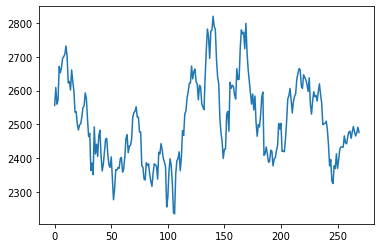

In [69]:
new_data = pd.DataFrame(np.concatenate((df_array, forecast)))
plt.plot(new_data)

**Creating LSTM model**

In [70]:
length = 20
batch_size = 30

generator = TimeseriesGenerator(scaled_train, scaled_train, length= length, batch_size= batch_size)

In [71]:
model3 = Sequential()

model3.add(LSTM(30, input_shape= (length, n_features)))
model3.add(Dropout(0.2))
model3.add(Dense(1))

model3.compile(optimizer= 'adam', loss= 'mse')

In [72]:
model3.fit_generator(generator, epochs= 10, shuffle= False)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


7/7 [==============================] - 2s 10ms/step - loss: 0.2131
Epoch 2/10
7/7 [==============================] - 0s 11ms/step - loss: 0.1127
Epoch 3/10
7/7 [==============================] - 0s 11ms/step - loss: 0.0473
Epoch 4/10
7/7 [==============================] - 0s 11ms/step - loss: 0.0266
Epoch 5/10
7/7 [==============================] - 0s 11ms/step - loss: 0.0318
Epoch 6/10
7/7 [==============================] - 0s 10ms/step - loss: 0.0307
Epoch 7/10
7/7 [==============================] - 0s 10ms/step - loss: 0.0277
Epoch 8/10
7/7 [==============================] - 0s 10ms/step - loss: 0.0295
Epoch 9/10
7/7 [==============================] - 0s 13ms/step - loss: 0.0268
Epoch 10/10
7/7 [==============================] - 0s 11ms/step - loss: 0.0232


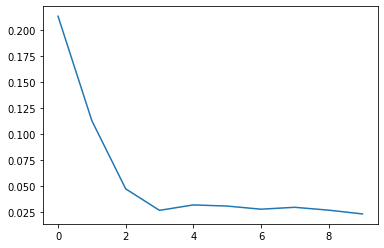

In [73]:
loss_df_3 = pd.DataFrame(model3.history.history)
plt.plot(loss_df_3)


In [74]:
test_predictions = []

first_batch = scaled_train[-length:]
curr_batch = first_batch.reshape((1,length,n_features))

for i in range(len(test)):
  # predict will return array- price at 0th and datatype at 1st index
  curr_pred = model3.predict(curr_batch)[0]

  test_predictions.append(curr_pred)

  # update append(array, value)- array with droped first row and new curr_pred
  curr_batch = np.append(curr_batch[:,1:,:], [[curr_pred]], axis=1)

1/1 [==============================] - 0s 18ms/step


In [75]:
import math
from sklearn.metrics import mean_squared_error, mean_absolute_error
print('MSE :', mean_squared_error(scaled_test, test_predictions))
print('RMES :', math.sqrt(mean_squared_error(scaled_test, test_predictions)))
print('MAS :', mean_absolute_error(scaled_test, test_predictions))

MSE : 0.028938469669776264
RMES : 0.1701131084595666
MAS : 0.135033077595836


In [76]:
test_predictions = scaler.inverse_transform(test_predictions)

In [77]:
test['LSTM_prediction'] = test_predictions


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [78]:
test

,Close,RNN_prediction,LSTM_prediction
230,2581.750000,2521.915947,2565.392225
231,2585.399902,2521.915947,2561.425091
232,2569.300049,2521.915947,2557.577527
233,2598.050049,2521.915947,2553.916653
234,2619.750000,2521.915947,2550.458210
235,2588.350098,2521.915947,2547.258449
236,2562.699951,2521.915947,2544.293895
237,2499.199951,2521.915947,2541.555771
238,2502.449951,2521.915947,2539.013392
239,2502.850098,2521.915947,2536.600057


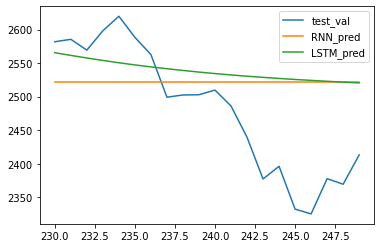

In [79]:
plt.plot(test['Close'], label ='test_val')
plt.plot(test['RNN_prediction'], label= 'RNN_pred')
plt.plot(test['LSTM_prediction'], label= 'LSTM_pred')
plt.legend()

**Creating LSTM Model for Forecasting**

In [80]:
length = 20
batch_size = 30

generator = TimeseriesGenerator(scaled_full_data, scaled_full_data, length= length, batch_size= batch_size)

In [81]:
LSTM_model = Sequential()

LSTM_model.add(LSTM(30, input_shape= (length, n_features)))
LSTM_model.add(Dropout(0.2))
LSTM_model.add(Dense(1))

LSTM_model.compile(optimizer= 'adam', loss= 'mse')

In [82]:
LSTM_model.fit_generator(generator, epochs= 10, shuffle= False)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


8/8 [==============================] - 2s 20ms/step - loss: 0.1470
Epoch 2/10
8/8 [==============================] - 0s 20ms/step - loss: 0.0449
Epoch 3/10
8/8 [==============================] - 0s 16ms/step - loss: 0.0334
Epoch 4/10
8/8 [==============================] - 0s 16ms/step - loss: 0.0310
Epoch 5/10
8/8 [==============================] - 0s 15ms/step - loss: 0.0289
Epoch 6/10
8/8 [==============================] - 0s 22ms/step - loss: 0.0264
Epoch 7/10
8/8 [==============================] - 0s 19ms/step - loss: 0.0245
Epoch 8/10
8/8 [==============================] - 0s 21ms/step - loss: 0.0268
Epoch 9/10
8/8 [==============================] - 0s 16ms/step - loss: 0.0263
Epoch 10/10
8/8 [==============================] - 0s 16ms/step - loss: 0.0244


In [83]:
forecast = []

first_batch = scaled_full_data[-length:]
curr_batch = first_batch.reshape((1,length,n_features))

for i in range(len(test)):

  curr_pred = LSTM_model.predict(curr_batch)[0]

  forecast.append(curr_pred)

  curr_batch = np.append(curr_batch[:,1:,:], [[curr_pred]], axis=1)

1/1 [==============================] - 0s 27ms/step


In [84]:
forecast = scaler.inverse_transform(forecast)
forecast

array([[2424.86899917],
       [2423.78975741],
       [2424.2485379 ],
       [2425.61423883],
       [2427.46738534],
       [2429.58207016],
       [2431.83877422],
       [2434.14110556],
       [2436.4456486 ],
       [2438.68269115],
       [2440.84185385],
       [2442.91357589],
       [2444.9068434 ],
       [2446.82137775],
       [2448.65254653],
       [2450.35843188],
       [2451.98776093],
       [2453.5079154 ],
       [2454.90571216],
       [2456.2291295 ]])

In [85]:
forecast.flatten()

array([2424.86899917, 2423.78975741, 2424.2485379 , 2425.61423883,
       2427.46738534, 2429.58207016, 2431.83877422, 2434.14110556,
       2436.4456486 , 2438.68269115, 2440.84185385, 2442.91357589,
       2444.9068434 , 2446.82137775, 2448.65254653, 2450.35843188,
       2451.98776093, 2453.5079154 , 2454.90571216, 2456.2291295 ])

In [88]:
df_array = np.array(reliance_price)

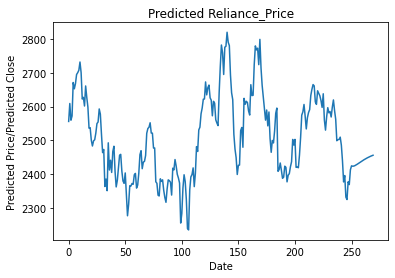

In [90]:
new_data = pd.DataFrame(np.concatenate((df_array, forecast)))
plt.plot(new_data)
plt.title("Predicted Reliance_Price")
plt.xlabel("Date")
plt.ylabel("Predicted Price/Predicted Close")

plt.show()